# Amazon Products Sales (2023) Data Analysis

# **Objectives:**

* What kind of products have the highest rating
* What factors mostly influence higher rating
* Are more products with discount have hight rating or the ones with their actual price
* What products have the highest rating but lowest price 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Amazon-Products.csv')

In [3]:
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


# Data Cleaning # 

Features in the dataset we do not need:

* Unnamed: 0
* image
* link

In [4]:
df.drop(['Unnamed: 0', 'image', 'link'], axis=1, inplace=True)
df.head(1)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   ratings         375791 non-null  object
 4   no_of_ratings   375791 non-null  object
 5   discount_price  490422 non-null  object
 6   actual_price    533772 non-null  object
dtypes: object(7)
memory usage: 29.5+ MB


Changing discount_price & actual_price from object to float data type

In [6]:
col_names = df[['discount_price', 'actual_price']]

for column in col_names:
    df[column] = df[column].str[1:]  # Remove first element in each row
    df[column] = df[column].str.replace(',', '') # Remove comma elements in each row
    df[column] = df[column].astype(float)  # Change data type to float

df.head(1)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",32999.0,58990.0


In [7]:
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

As we can see, we have some values which are not right, so we'll remove them

In [8]:
df.drop(df[df['ratings'] == 'nan'].index, inplace=True)
df.drop(df[df['ratings'] == 'Get'].index, inplace=True)
df.drop(df[df['ratings'] == '₹'].index, inplace=True)
df.drop(df[df['ratings'] == 'FREE'].index, inplace=True)
df.drop(df[df['ratings'] == '₹68.99'].index, inplace=True)
df.drop(df[df['ratings'] == '₹65'].index, inplace=True)
df.drop(df[df['ratings'] == '₹70'].index, inplace=True)
df.drop(df[df['ratings'] == '₹100'].index, inplace=True)
df.drop(df[df['ratings'] == '₹99'].index, inplace=True)
df.drop(df[df['ratings'] == '₹2.99'].index, inplace=True)

df = df.dropna()

In [9]:
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '4.8', '4.7', '3.2', '2.5', '1.0', '2.6', '2.8', '1.7',
       '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.3', '2.0', '1.4',
       '2.1', '1.2', '1.3', '1.5', '1.1'], dtype=object)

In [10]:
df.isnull().sum()

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

All missing values are now removed

In [11]:
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '')
df['no_of_ratings'] = df['no_of_ratings'].astype(float)
df['ratings'] = df['ratings'].astype(float) 

df.head(1)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0


# EDA #

Now that we have cleaned up our data, lets do some analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334963 entries, 0 to 551584
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            334963 non-null  object 
 1   main_category   334963 non-null  object 
 2   sub_category    334963 non-null  object 
 3   ratings         334963 non-null  float64
 4   no_of_ratings   334963 non-null  float64
 5   discount_price  334963 non-null  float64
 6   actual_price    334963 non-null  float64
dtypes: float64(4), object(3)
memory usage: 20.4+ MB


So before cleaning up, we had **551585 entries** and after removing missing values, we have **334963 entries**

Let's also change the categories into values (one hot encoding)

In [13]:
df['main_category'].value_counts()

accessories                62869
women's clothing           60447
tv, audio & cameras        46756
men's clothing             37025
appliances                 25547
men's shoes                24833
stores                     22191
home & kitchen             12524
sports & fitness            8028
beauty & health             6723
kids' fashion               5698
car & motorbike             5156
toys & baby products        4591
bags & luggage              3213
industrial supplies         2592
women's shoes               2435
grocery & gourmet foods     2343
pet supplies                1232
music                        748
home, kitchen, pets           12
Name: main_category, dtype: int64

In [14]:
print("Total number of main categories: ", len(df['main_category'].value_counts()))

Total number of main categories:  20


In [15]:
print("Total number of sub categories: ", len(df['sub_category'].value_counts()))

Total number of sub categories:  112


In [16]:
df.corr()

,ratings,no_of_ratings,discount_price,actual_price
ratings,1.000000,0.040749,0.057262,-0.004137
no_of_ratings,0.040749,1.000000,0.010138,-0.000159
discount_price,0.057262,0.010138,1.000000,0.000196
actual_price,-0.004137,-0.000159,0.000196,1.000000


As we can see that ratings have a large positive relation with discount price and a large negative relation with the actual price

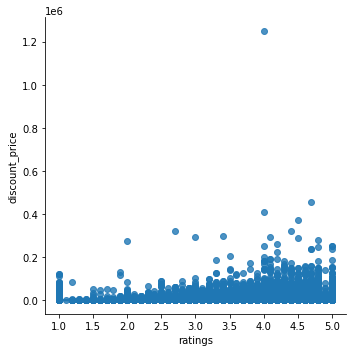

In [17]:
sns.lmplot(x='ratings', y='discount_price', data=df)

We have an anomaly, lets look into it

In [18]:
df[df['discount_price'] > 1200000]

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
498818,Samsung 214 cm (85 inches) 8K Ultra HD Smart N...,"tv, audio & cameras",Televisions,4.0,10.0,1249990.0,1594900.0


In [19]:
df = df.drop(df[df['discount_price'] == 1249990.0].index)

Now that we've dropped the anomaly, lets look at the graph again

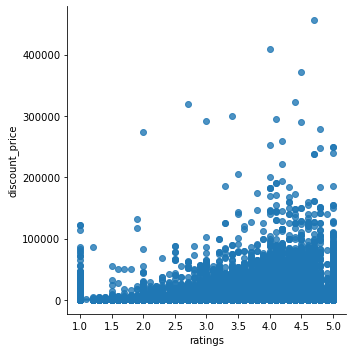

In [21]:
sns.lmplot(x='ratings', y='discount_price', data=df)

We can see that as the price goes up (even though it is a discount), rating tend to increase

Most values are under the 100,000 Indian Rupee mark

In [22]:
main_category = df.groupby('main_category')

mean_main_category = main_category.mean()

print(mean_main_category)

                          ratings  no_of_ratings  discount_price  \
main_category                                                      
accessories              3.893068     166.461627     1521.437542   
appliances               3.843524     648.962657     4991.651877   
bags & luggage           3.898101     364.176471     1615.557420   
beauty & health          3.985691    1375.403540      640.712530   
car & motorbike          3.719957     264.368891      971.441716   
grocery & gourmet foods  4.059496     590.824584      445.093538   
home & kitchen           3.974760     707.011019      923.799364   
home, kitchen, pets      3.408333       3.916667     3812.916667   
industrial supplies      3.820833     354.000772     1884.412762   
kids' fashion            3.834223     233.700246      796.628220   
men's clothing           3.751430     105.322188      802.220609   
men's shoes              3.599170     192.432771     1823.178395   
music                    3.928877     303.743316

We're looking at the mean values of each caterogry:

* ratings have an avergae between 3 - 4 in all categories

In [23]:
# Find the highest value in each group
max_main_category = main_category['name', 'discount_price', 'ratings'].max()

print(max_main_category)

C:\Users\saaih\AppData\Local\Temp/ipykernel_15840/2467201643.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_main_category = main_category['name', 'discount_price', 'ratings'].max()


                                                                      name  \
main_category                                                                
accessories               Stainless Steel Belly Button Ring Body Silver...   
appliances               ﻿﻿Lifelong Digital Air Fryer LLHFD722 , 7.5 Li...   
bags & luggage           ®Kshavi Moving Straps Transport Rope Belt Home...   
beauty & health          • Philips Sonicare Electric Toothbrush I No 1 ...   
car & motorbike          ‎PBC Export Mini Car Body Dent Remover Repair ...   
grocery & gourmet foods  ÖUI Signature Edition Belgian Waffle Breakfast...   
home & kitchen           ☆LBY ute Cotton Basket, Handcrafted Woven Stor...   
home, kitchen, pets      USHA (Renewed) Striker Platinum 1200mm 80-watt...   
industrial supplies      zhart Vernier Caliper Digital 150 mm/6-Inches ...   
kids' fashion            |Dulari gifts| Led Watch Set of - 5 Multi Colo...   
men's clothing           zzupps Men's Cotton Briefs (Pack of 1) 